In [10]:
import dill

In [12]:
dill.dump_session('Datasets.db')

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import math

import matplotlib.pyplot as plt

from scipy.spatial import distance

mbyte = 1048576
norm_l1 = Normalizer(norm='l1')
norm_l2 = Normalizer(norm='l2')

# Set your dataset path

In [2]:
path = '' # /home/username/datasets/
path = '/home/kleist/file/datasets/'

# Tools

In [3]:
from hashlib import md5

def find_nearest_neighbor(P, q):
    dis = np.array([distance.euclidean(p, q) for p in P])
    return np.argsort(dis)[0]

def fvecs_read(filename, c_contiguous=True):
    fv = np.fromfile(filename, dtype=np.float32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv.view(np.int32)[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    if not all(fv.view(np.int32)[:, 0] == dim):
        raise IOError("Non-uniform vector sizes in " + filename)
    fv = fv[:, 1:]
    if c_contiguous:
        fv = fv.copy()
    return fv


def store_dataset(title, train, test, K, distance_function):
    data = dict()
    data['title'] = title
    data['train'] = train
    data['test'] = test
    data['K'] = K
    data['n_train'] = train.shape[0]
    data['n_test'] = test.shape[0]
    
    k_near_neighbors = []
    nearest_neighbor = []

    for i, q in enumerate(test):
        d = np.array([distance_function(q, p) for p in train])
        order_d = d.argsort()
        
        k_near_neighbors.append(order_d[:K])
        nearest_neighbor.append(order_d[0])
        
    data['k_near_neighbors'] = k_near_neighbors
    data['nearest_neighbor'] = nearest_neighbor
    
    return data

# Datasets Arguments

In [4]:
Datasets = dict()

# SIFT
[website](http://corpus-texmex.irisa.fr/)

## 10K
[download](ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz)

In [5]:
train = fvecs_read(path + 'sift/sifts-10K/sift_base.fvecs').astype(np.int)
test = fvecs_read(path + 'sift/sifts-10K/sift_query.fvecs').astype(np.int)

In [6]:
%%time
sift = store_dataset(title='SIFT-10K', train=train, test=test, K=50, 
                     distance_function=distance.euclidean)

CPU times: user 12.8 s, sys: 10.3 ms, total: 12.8 s
Wall time: 12.8 s


In [7]:
Datasets['SIFT-10K'] = sift

## data structure

In [ ]:
q = test[0]

In [ ]:
%%time
d2 = np.array([distance.cosine(q, p) for p in train])
d2 = np.arccos(np.array([distance.cosine(q, p) for p in train]))
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

In [ ]:
%%time
d2 = np.array([distance.euclidean(q, p) for p in train])
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

# MNIST

In [9]:
mnist = datasets.fetch_mldata('mnist-original')['data']

/usr/local/software/anaconda/envs/ana/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/software/anaconda/envs/ana/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


## Hamming

In [10]:
mnist_hamming = mnist.copy()

In [11]:
mnist_hamming[mnist_hamming > 0] = 1

In [12]:
train, test = train_test_split(mnist_hamming, test_size=500, random_state=1)
train.shape, test.shape

((69500, 784), (500, 784))

(array([3.91686651e-03, 4.70023981e-02, 1.13589129e-01, 3.32933653e-01,
        5.09192646e-01, 7.01119105e-01, 9.71382894e-01, 1.35131894e+00,
        9.28297362e-01, 1.57066347e+00, 1.60199840e+00, 1.31606715e+00,
        1.26906475e+00, 1.22597922e+00, 1.19464428e+00, 1.24556355e+00,
        8.69544365e-01, 1.19072742e+00, 1.04972022e+00, 1.13197442e+00,
        1.18289369e+00, 1.26123102e+00, 1.31215028e+00, 1.39440448e+00,
        1.53541167e+00, 1.18289369e+00, 1.82917666e+00, 2.01718625e+00,
        2.33445244e+00, 2.65955236e+00, 2.95723421e+00, 3.35283773e+00,
        3.96778577e+00, 2.77705835e+00, 4.53573141e+00, 4.62190248e+00,
        5.24860112e+00, 5.64028777e+00, 5.96147082e+00, 6.36490807e+00,
        6.49808153e+00, 4.71199041e+00, 7.00335731e+00, 7.51646683e+00,
        7.31278977e+00, 7.67705835e+00, 7.42637890e+00, 7.69272582e+00,
        7.33629097e+00, 5.10367706e+00, 7.49296563e+00, 7.29320544e+00,
        7.37937650e+00, 7.10911271e+00, 6.85451639e+00, 6.509832

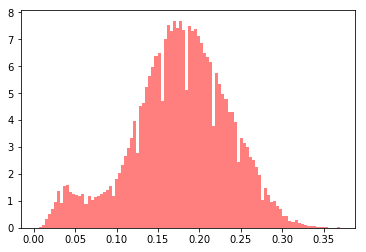

In [13]:
q = test[0]
d2 = np.array([distance.hamming(q, p) for p in train])
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

(array([9.07791117e-06, 2.26947779e-05, 5.90064226e-05, 1.04395978e-04,
        1.58863446e-04, 4.35739736e-04, 4.72051381e-04, 8.80557384e-04,
        1.33899190e-03, 1.65671879e-03, 1.95175090e-03, 2.77784082e-03,
        2.23316615e-03, 2.59628260e-03, 2.72791231e-03, 2.85954202e-03,
        2.98209382e-03, 4.23484556e-03, 3.29982071e-03, 3.72648254e-03,
        3.92619658e-03, 4.33924154e-03, 4.98831219e-03, 6.94006309e-03,
        5.58745433e-03, 6.10035631e-03, 6.25468080e-03, 6.98999160e-03,
        7.44388716e-03, 1.05666886e-02, 8.14288632e-03, 8.59224292e-03,
        8.91904773e-03, 8.95082042e-03, 8.91450877e-03, 1.22279463e-02,
        9.30032000e-03, 9.47280031e-03, 9.10514491e-03, 8.81465175e-03,
        8.67848308e-03, 1.17332002e-02, 7.98856183e-03, 7.56643896e-03,
        7.15793296e-03, 7.06715385e-03, 6.71311531e-03, 8.68302204e-03,
        5.80986315e-03, 5.48759730e-03, 5.01100697e-03, 4.73866963e-03,
        5.85071375e-03, 4.08959898e-03, 3.37244400e-03, 3.236275

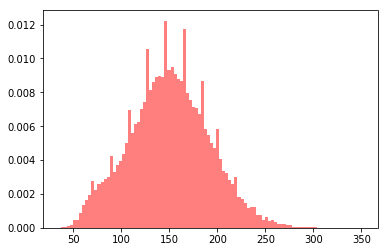

In [17]:
plt.hist(np.sum(train, axis=1), bins=100, color='r', alpha=0.5, density=True)

In [18]:
data_mnist_hamming = store_dataset(title='MNIST-Hamming', train=train, test=test, K=100, 
                                   distance_function=distance.hamming)

In [19]:
Datasets['MNIST-Hamming'] = data_mnist_hamming

# Store Dataset

In [8]:
# 最近邻数据
%store Datasets

Stored 'Datasets' (dict)


**Read data in other notebook.**

In [9]:
# %store -r Datasets